In [ ]:
# cài dặt các thứ viện cần thiết vào
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

sns.set()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
heart_df = pd.read_csv('/content/drive/MyDrive/MarchineLeaning/heart.csv')

In [ ]:
print('Tổng quan dữ liệu:',heart_df.shape)

Tổng quan dữ liệu: (303, 14)


In [ ]:
#Xem thử 10 dòng đầu của dữ liệu 
heart_df.head(300)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0


In [ ]:
# heart_df.info()
#Xem trung binh của tập dữ liệu
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#Tổng só bệnh nhân dựa trên giới tính
female = len(heart_df[heart_df.sex==0])
male = len(heart_df[heart_df.sex==1])
print("Tổng số bệnh nhân nam mắc bệnh: {:.4f}".format((male/ (len(heart_df.sex)))*100))
print("Tổng số bệnh nhân nữ mắc bệnh: {:.4f}".format((female/ (len(heart_df.sex)))*100))

Tổng số bệnh nhân nam mắc bệnh: 68.3168
Tổng số bệnh nhân nữ mắc bệnh: 31.6832


In [ ]:
#Tổng só bệnh nhân dựa có bệnh hay không có bệnh
havenot_disease = len(heart_df[heart_df.target==0])
have_disease = len(heart_df[heart_df.target==1])
print('Tỷ lệ phần trăm người mắc bệnh tim {:.4f}'.format((have_disease/ (len(heart_df.target)))*100))
print('Tỷ lệ phần trăm người không mắc bệnh tim {:.4f}'.format((havenot_disease/ (len(heart_df.target)))*100))

Tỷ lệ phần trăm người mắc bệnh tim 54.4554
Tỷ lệ phần trăm người không mắc bệnh tim 45.5446


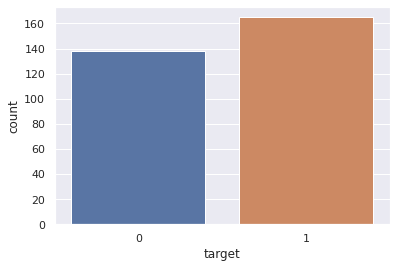

In [ ]:
#Xem Tổng quan về có bênh hay không có bệnh 
sns.countplot(heart_df.target)

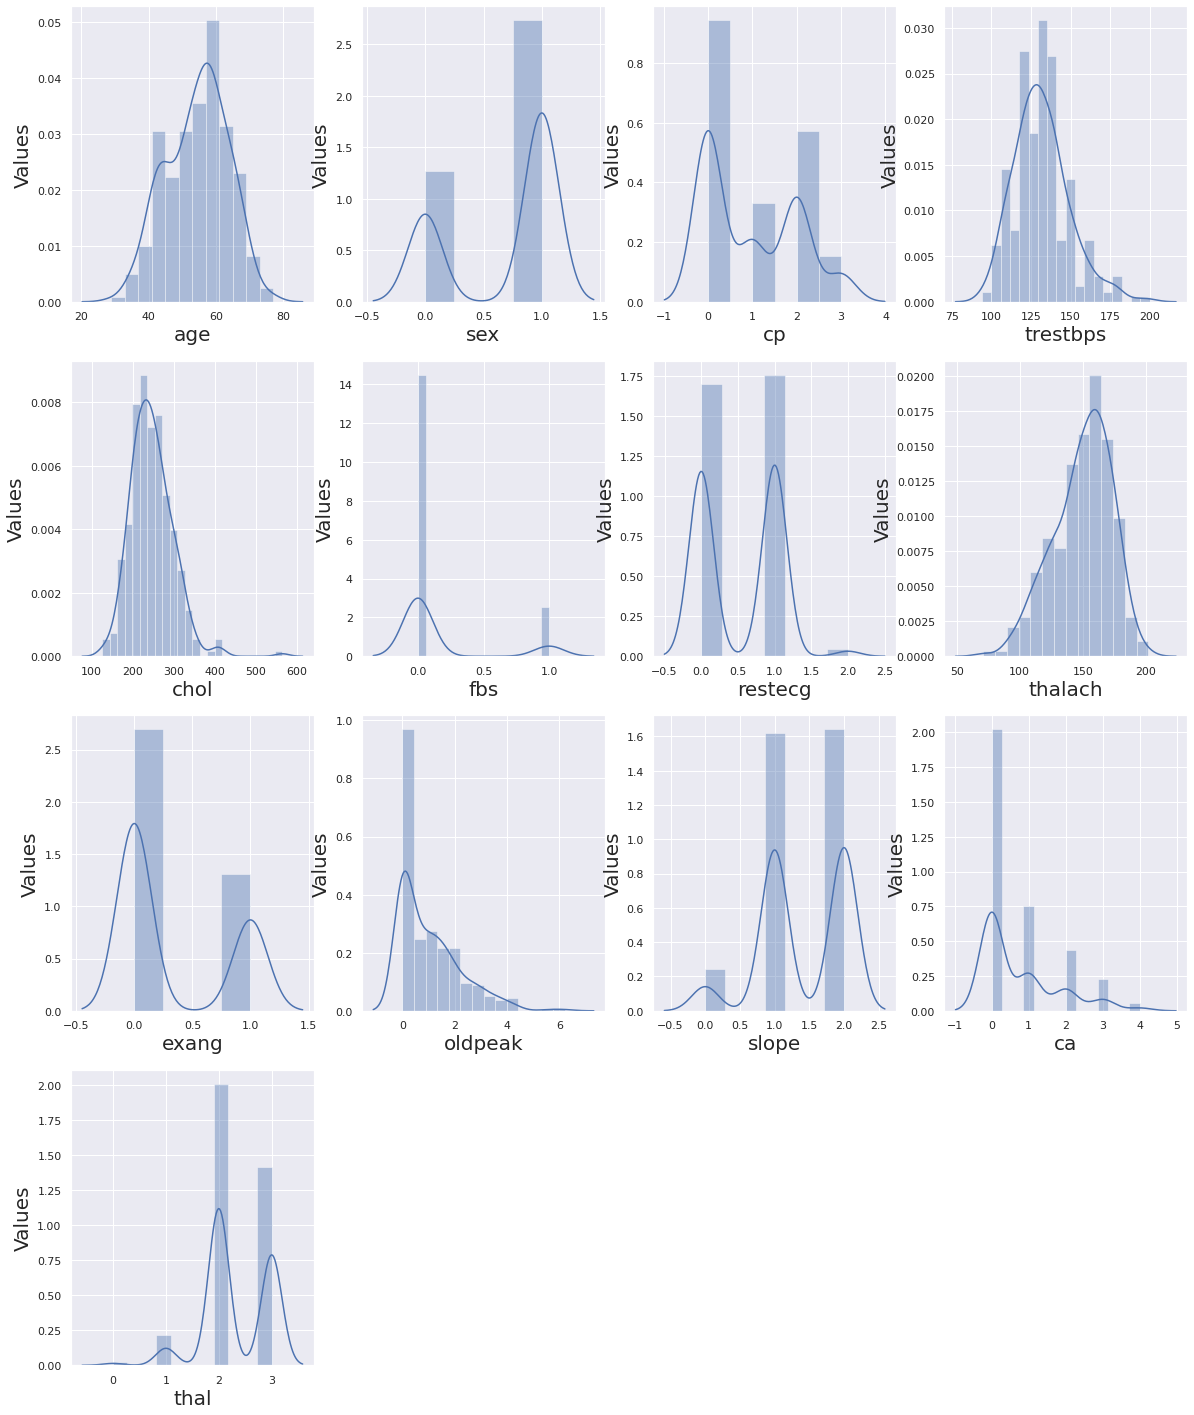

In [ ]:
#Vẽ sơ đồ phân phối tổng quan về các dữ liệu trên 
plt.figure(figsize=(20,25))
plotnumber=1
for column in heart_df:
  if plotnumber<14:
    ax=plt.subplot(4,4,plotnumber)
    sns.distplot(heart_df[column])
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Values',fontsize=20)
  plotnumber+=1
plt.show()

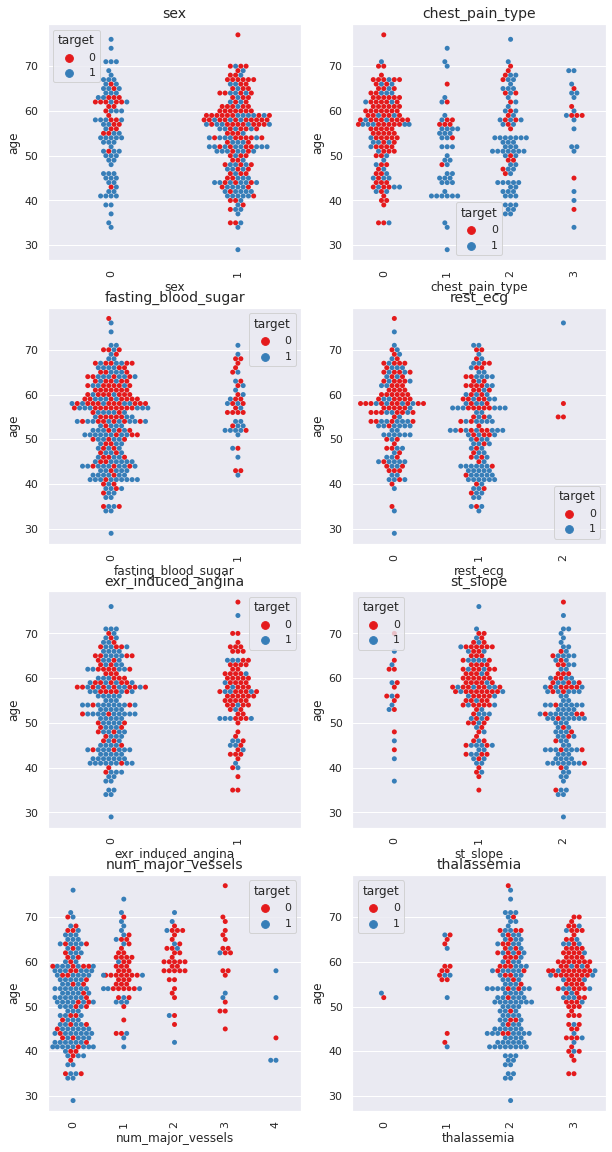

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MarchineLeaning/heart.csv')
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
        'exr_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
cat_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg','exr_induced_angina', 'st_slope', 'num_major_vessels', 'thalassemia']
num_cols = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved','st_depression']
plt.figure(figsize=(10,20))
for i, col in enumerate(cat_cols):
    plt.subplot(4,2, i+1)
    sns.swarmplot(data = df, x = col, y = 'age', hue = 'target', palette = 'Set1')
    plt.xticks(rotation = 90)
    plt.title(f"{col}", fontsize = 14)

Q1: Ans1
Youger are more prone toward heart attack rather than above 55

Q2: Are different types of chest pain related to each other or the possibility of getting a heart attack?
Ans: chest pain type 0 is less likely to have heart attack while chest pain type 2 is most related to heart attack.

Q3 Does high blood pressure increase the risk of heart attack?
Ans: blood pressure does not impact the heart attack, even high blood pressure are less prone to heart attack, it seems weird, but this is what we can observe from the data.

Q4. Does the cholestrol level eventually contribute as a risk factor towards heart attack?
Ans: cholestrol level in range of 200-300 are maximum prone to heart attack

In [ ]:
#Kiểm tra phương sai của dữ liệu
print(heart_df.var())

age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64


#  **Ta có thể thấy một sự khác biết rất lớn về các tập dự liệu trên, vì vậy ta đi đến bước tiếp theo là trực quan hóa dữ liệu**

In [ ]:
heart_df['age']=np.log(heart_df['age'])
heart_df['trestbps']=np.log(heart_df['trestbps'])
heart_df['chol']=np.log(heart_df['chol'])
heart_df['thalach']=np.log(heart_df['thalach'])

np.var(heart_df[["age","trestbps",'chol','thalach']])

age         0.030554
trestbps    0.016894
chol        0.041401
thalach     0.027054
dtype: float64

In [ ]:
print(heart_df.var())

age         0.030655
sex         0.217166
cp          1.065132
trestbps    0.016950
chol        0.041538
fbs         0.126877
restecg     0.276528
thalach     0.027143
exang       0.220707
oldpeak     1.348095
slope       0.379735
ca          1.045724
thal        0.374883
target      0.248836
dtype: float64


In [ ]:
print(f"Dữ liệu trước khi loại bỏ: {heart_df.shape}")
heart_df.drop_duplicates(inplace = True)
print(f"Dữ liệu sau khi loại bỏ: {heart_df.shape}")

Dữ liệu trước khi loại bỏ: (303, 14)
Dữ liệu sau khi loại bỏ: (302, 14)


In [ ]:
#Tổng quan lại các dữ liệu trên
print(heart_df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:

#Đặt biên x , y cho dữ liệu trên đễ chia dữ liệu train test
#Biến phản hồi là có bị bệnh hay không các biến còn lại là biến giải thích
X = heart_df.drop('target', axis=1)
y = heart_df[['target']]
print(X.shape)
print(y.shape)

(302, 13)
(302, 1)


In [ ]:
#Thêm các thư viện cần thiết
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## **Chia tập dữ liệu Train và Test sử dụng hàm tran_test_split**

In [ ]:
# Điều Chỉnh phân chia tập dữ liệu tran 70 test 30 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
#X_train_ss
X_test_ss = ss.fit_transform(X_test)


In [ ]:
 # Đếm tập dữ liệu training data 
X_train.count()

age         211
sex         211
cp          211
trestbps    211
chol        211
fbs         211
restecg     211
thalach     211
exang       211
oldpeak     211
slope       211
ca          211
thal        211
dtype: int64

In [ ]:
# Đếm tập dữ liệua testing Data 
X_test.count ()

age         91
sex         91
cp          91
trestbps    91
chol        91
fbs         91
restecg     91
thalach     91
exang       91
oldpeak     91
slope       91
ca          91
thal        91
dtype: int64

# **Sử dụng mô hình Navie Bayes để huấn luyện**

In [ ]:
# Sử dụng thuật toán Navie Bayes để train

navie = GaussianNB()
navie.fit(X_train_ss, y_train)
score = navie.score(X_train_ss, y_train)
print("Độ chính xác Navie Bayes", score)

Độ chính xác Navie Bayes 0.8199052132701422


In [ ]:
#Hàm để lưu model Navies lại
filename = 'model_NavieBayes.joblib'
from joblib import dump, load
dump(navie, filename) 

['model_NavieBayes.joblib']

In [ ]:
# navie = load('model_NavieBayes.joblib') 

In [ ]:
navie_pred = navie.predict(X_test_ss)
print(len(navie_pred))
print(navie_pred)

91
[0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1
 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1]


In [ ]:
navie_cm =(confusion_matrix(y_test, navie_pred))

In [ ]:
#In ra dự đoán dựa trên ma trận về dữ liệu áp dụng thuật toán Navie Bayes
print("Confusion matrix of the model",confusion_matrix(y_test,navie_pred))

print("Classification Report",classification_report(y_test,navie_pred))

Confusion matrix of the model [[35  7]
 [ 6 43]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.83      0.84        42
           1       0.86      0.88      0.87        49

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



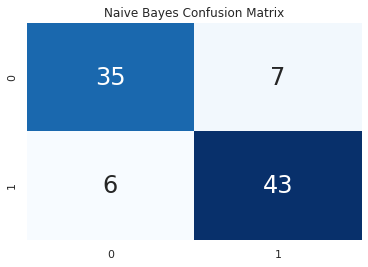

In [ ]:
# Đưa ra ma trận vã ra cho dễ nhìn
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(navie_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
key = ['Navie Bayses']
value = [GaussianNB()]
models = dict(zip(key,value))

In [ ]:
from sklearn.model_selection import KFold, cross_validate
cv=KFold(5, shuffle=True, random_state=21)

In [ ]:
def model_check(X, y, classifiers, cv):
    
    
    
    model_table = pd.DataFrame()

    row_index = 0
    for cls in classifiers:

        MLA_name = cls.__class__.__name__
        model_table.loc[row_index, 'Model Name'] = MLA_name
        
        cv_results = cross_validate(
            cls,
            X,
            y,
            cv=cv,
            scoring=('accuracy','f1','roc_auc'),
            return_train_score=True,
            n_jobs=-1
        )
        model_table.loc[row_index, 'Train Roc/AUC Mean'] = cv_results['train_roc_auc'].mean()
        model_table.loc[row_index, 'Test Roc/AUC Mean'] = cv_results['test_roc_auc'].mean()
        model_table.loc[row_index, 'Test Roc/AUC Std'] = cv_results['test_roc_auc'].std()
        model_table.loc[row_index, 'Train Accuracy Mean'] = cv_results['train_accuracy'].mean()
        model_table.loc[row_index, 'Test Accuracy Mean'] = cv_results['test_accuracy'].mean()
        model_table.loc[row_index, 'Test Acc Std'] = cv_results['test_accuracy'].std()
        model_table.loc[row_index, 'Train F1 Mean'] = cv_results['train_f1'].mean()
        model_table.loc[row_index, 'Test F1 Mean'] = cv_results['test_f1'].mean()
        model_table.loc[row_index, 'Test F1 Std'] = cv_results['test_f1'].std()
        model_table.loc[row_index, 'Time'] = cv_results['fit_time'].mean()

        row_index += 1        

    model_table.sort_values(by=['Test F1 Mean'],
                            ascending=False,
                            inplace=True)

    return model_table

In [ ]:
raw_models = model_check(X_train, y_train, models.values(), cv)

In [ ]:
raw_models

,Model Name,Train Roc/AUC Mean,Test Roc/AUC Mean,Test Roc/AUC Std,Train Accuracy Mean,Test Accuracy Mean,Test Acc Std,Train F1 Mean,Test F1 Mean,Test F1 Std,Time
0,GaussianNB,0.914483,0.885864,0.04018,0.830537,0.805426,0.039021,0.846862,0.809689,0.073305,0.004561


# **Sử dụng Model Ann để thử huấn luyện model**

In [ ]:
#Áp dụng thuận toán khác, Sử dụng thuật toán ANN để đánh giá với bộ dữ liệu trên 
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import matplotlib.pyplot as plt

In [ ]:
# Tạo mô hình ANN 3 lớp 
modelAnn = Sequential()
# Tạo lớp ẩn đầu tiên là lớp input đầu vào
modelAnn.add(Dense(units = 128, activation='relu', kernel_initializer = 'he_uniform', input_dim = 13))
# Tạo thêm lớp ẩn thứ 2
modelAnn.add(Dense(units = 16, activation='relu', kernel_initializer = 'he_uniform'))
# Mạng Ann với 2 lớp trên tạo ra lớp đầu ra output cho lớp này 
modelAnn.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'glorot_uniform'))

In [ ]:
# Bây giờ ta bắt đầu biên dịch mô hình đã khởi tạo từ các lớp Ann ở trên 
modelAnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Huấn luyện để tạo ra model 
# Ở đây ta thử cho vòng lặp Epochs là 200 xem nó có overfit hay chưa
# Nếu overfit thì ra sẽ giảm nó xuống 
modelAnn.fit(X_train, y_train, batch_size = 128, epochs = 200, verbose = 1)

Epoch 1/200
2/2 [==============================] - 15s 9ms/step - loss: 0.8681 - accuracy: 0.5508
Epoch 2/200
2/2 [==============================] - 0s 7ms/step - loss: 0.7074 - accuracy: 0.5812
Epoch 3/200
2/2 [==============================] - 0s 7ms/step - loss: 0.7333 - accuracy: 0.5551
Epoch 4/200
2/2 [==============================] - 0s 6ms/step - loss: 0.6423 - accuracy: 0.6616
Epoch 5/200
2/2 [==============================] - 0s 5ms/step - loss: 0.5889 - accuracy: 0.7109
Epoch 6/200
2/2 [==============================] - 0s 5ms/step - loss: 0.5903 - accuracy: 0.7256
Epoch 7/200
2/2 [==============================] - 0s 14ms/step - loss: 0.5381 - accuracy: 0.7461
Epoch 8/200
2/2 [==============================] - 0s 10ms/step - loss: 0.5392 - accuracy: 0.7472
Epoch 9/200
2/2 [==============================] - 0s 8ms/step - loss: 0.5207 - accuracy: 0.7509
Epoch 10/200
2/2 [==============================] - 0s 7ms/step - loss: 0.4947 - accuracy: 0.7587
Epoch 11/200
2/2 [========

In [ ]:
# Kiểm tra model trên với tập Test đã được chia
acc = modelAnn.evaluate(X_test, y_test)


3/3 [==============================] - 0s 4ms/step - loss: 0.4143 - accuracy: 0.8352


In [ ]:
modelAnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                2064      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 3,873
Trainable params: 3,873
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Nếu nhỏ hơn 0.5 là không có bệnh lớn hơn là có Bệnh
y_ann = modelAnn.predict(X_test_ss)
y_ann = y_ann > 0.5

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_ann, y_test)
cm

array([[36, 14],
       [ 6, 35]])

In [ ]:
# Lưu mô hình của Mạng Ann
MODEL_Ann = "ModelAnn.h5"
modelAnn.save_weights(MODEL_Ann)

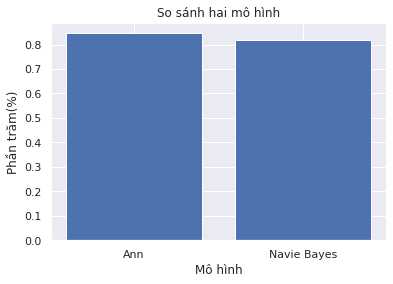

In [ ]:
# So Sánh mô hình Ann với mô hình Navies Bayes
Nb = 0.8199 
Ann = 0.8462
_model = {'Navie Bayes': Nb, 'Ann': Ann}
Pt = sorted(_model.values(), reverse=True)
Namemodel = sorted(_model, key=_model.__getitem__, reverse=True)
ind_name= range(len(_model))

plt.bar(ind_name, Pt, align='center')
plt.xticks(ind_name, Namemodel)
plt.xlabel('Mô hình')
plt.ylabel('Phần trăm(%)')
# Label title of bar char
plt.title('So sánh hai mô hình')
plt.show()